In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [29]:
path = "/home/hasib/semester7/reinforcement_learning/project/stats a2c/logs-20241222T164146Z-001/logs/a2c"

In [30]:
stats = [[],[],[],[]]
# Walk through the directory
for root, dirs, files in os.walk(top=path):
    for file in files:  # Iterate over the files in the current directory
        if file.endswith(".csv"):  # Check if the file has a .csv extension
            stats[int(file[0])].append(os.path.join(root, file))  # Add the full file path to stats

# # Print the collected stats
# print(stats[0])


In [31]:
data_arrays = []
for i in stats:
    temp_arrays = None
    for file_path in i:
        data = np.genfromtxt(file_path, delimiter=',', skip_header=2)
        if temp_arrays is not None:
            temp_arrays = np.vstack((temp_arrays,data))
        else:
            temp_arrays = data

    data_arrays.append(temp_arrays[:2475,:])

In [32]:
combined_data = data_arrays

In [33]:
for i in combined_data:
    print(i.shape)

(2475, 3)
(2475, 3)
(2475, 3)
(2475, 3)


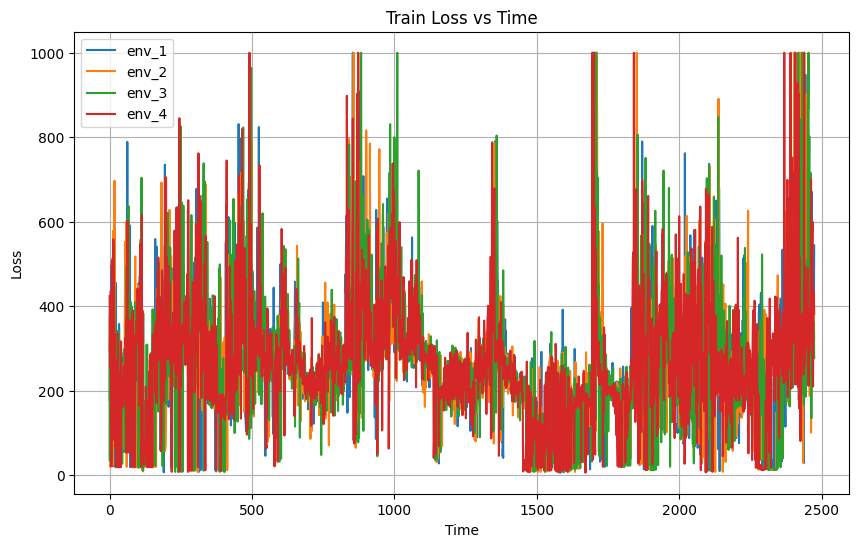

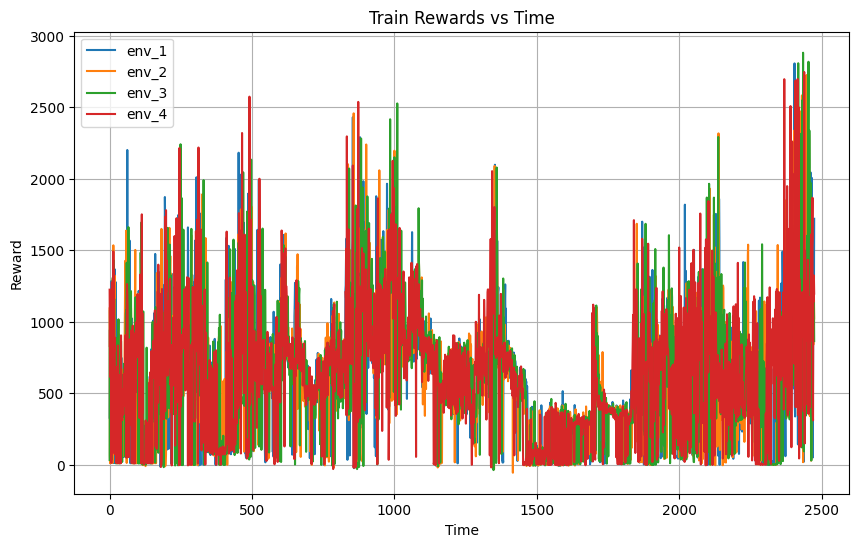

In [34]:
import matplotlib.pyplot as plt

# Plot: Loss vs. Time for combined data
plt.figure(figsize=(10, 6))
plt.title("Train Loss vs Time")
for idx, item in enumerate(combined_data):
    plt.plot(np.arange(len(item[:, -1])), item[:, -2], label=f"env_{idx + 1}")  # Time vs. Loss
plt.xlabel("Time")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot: Reward vs. Time for combined data
plt.figure(figsize=(10, 6))
plt.title("Train Rewards vs Time")
for idx, item in enumerate(combined_data):
    plt.plot(np.arange(len(item[:, -1])), item[:, -3], label=f"env_{idx + 1}")  # Time vs. Reward
plt.xlabel("Time")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()


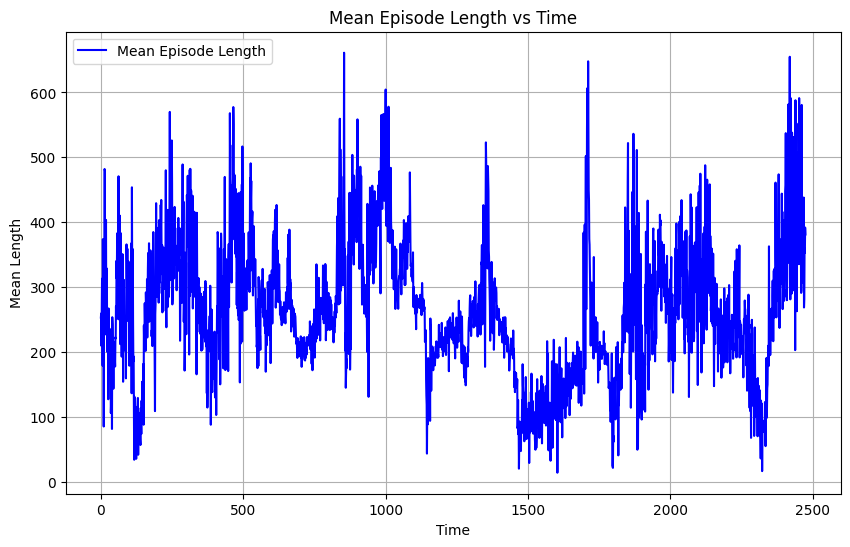

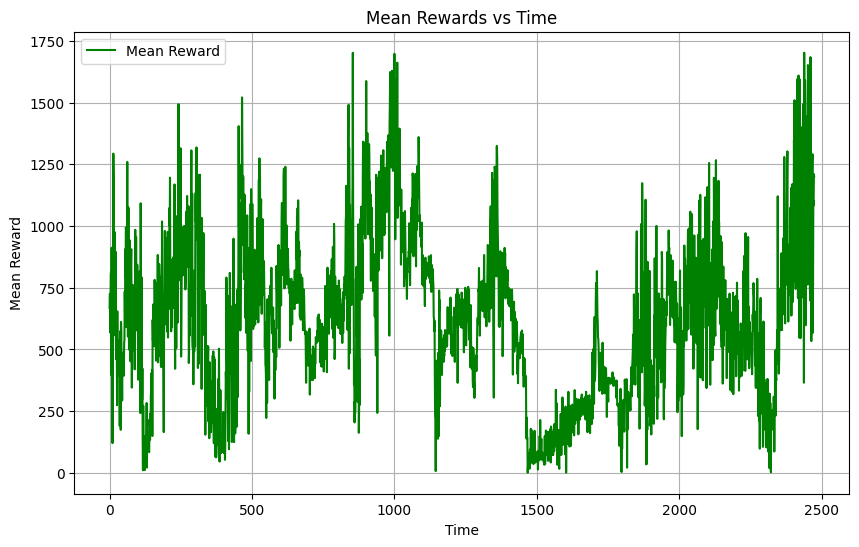

In [35]:
# Calculate the mean across all 4 environments
mean_loss = np.mean([item[:, -2] for item in combined_data], axis=0)  # Mean over loss values
mean_reward = np.mean([item[:, -3] for item in combined_data], axis=0)  # Mean over reward values
time = combined_data[0][:, -1]  # Time from any of the arrays (they should all be the same)

# Plot: Mean Loss vs. Time
plt.figure(figsize=(10, 6))
plt.title("Mean Episode Length vs Time")
plt.plot( mean_loss, label="Mean Episode Length", color='b')
plt.xlabel("Time")
plt.ylabel("Mean Length")
plt.legend()
plt.grid(True)
plt.show()

# Plot: Mean Reward vs. Time
plt.figure(figsize=(10, 6))
plt.title("Mean Rewards vs Time")
plt.plot( mean_reward, label="Mean Reward", color='g')
plt.xlabel("Time")
plt.ylabel("Mean Reward")
plt.legend()
plt.grid(True)
plt.show()

In [36]:
eval_logs_path = "logs/content/logs/ppo/Walker2d-v4_4/Walker2d-v4.zip"
eval_data = np.load(eval_logs_path)

FileNotFoundError: [Errno 2] No such file or directory: 'logs/content/logs/ppo/Walker2d-v4_4/Walker2d-v4.zip'

In [257]:
eval_data["data"]

b'{\n    "policy_class": {\n        ":type:": "<class \'abc.ABCMeta\'>",\n        ":serialized:": "gAWVOwAAAAAAAACMIXN0YWJsZV9iYXNlbGluZXMzLmNvbW1vbi5wb2xpY2llc5SMEUFjdG9yQ3JpdGljUG9saWN5lJOULg==",\n        "__module__": "stable_baselines3.common.policies",\n        "__doc__": "\\n    Policy class for actor-critic algorithms (has both policy and value prediction).\\n    Used by A2C, PPO and the likes.\\n\\n    :param observation_space: Observation space\\n    :param action_space: Action space\\n    :param lr_schedule: Learning rate schedule (could be constant)\\n    :param net_arch: The specification of the policy and value networks.\\n    :param activation_fn: Activation function\\n    :param ortho_init: Whether to use or not orthogonal initialization\\n    :param use_sde: Whether to use State Dependent Exploration or not\\n    :param log_std_init: Initial value for the log standard deviation\\n    :param full_std: Whether to use (n_features x n_actions) parameters\\n        for the s